In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Analyse Exploratoire des Données (EDA)

In [38]:
df = pd.read_csv("water_potability.csv")

In [39]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


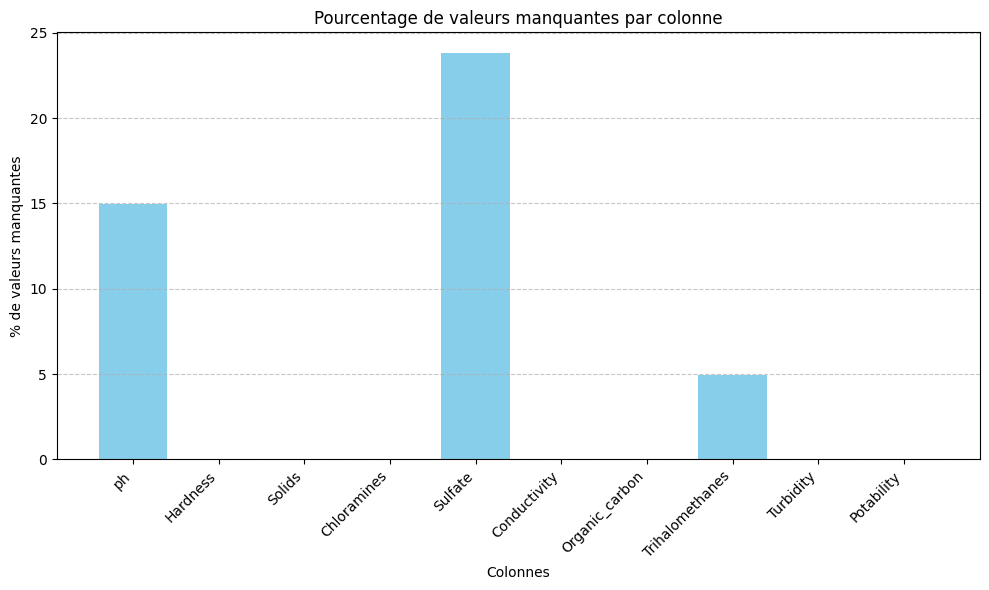

In [40]:
missing_percentages = [(1 - df[column].dropna().shape[0] / df[column].shape[0]) * 100 for column in df.columns]

plt.figure(figsize=(10, 6))
plt.bar(df.columns, missing_percentages, color='skyblue')
plt.xlabel('Colonnes')
plt.ylabel('% de valeurs manquantes')
plt.title('Pourcentage de valeurs manquantes par colonne')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [41]:
df_potable = df.loc[df['Potability'] == 1,:]
df_non_potable = df.loc[df['Potability'] == 0,:]
print(f"Dans notre Dataset, il y a {df_potable.shape[0]} échantillons d'eau potable et {df_non_potable.shape[0]} échantillons d'eau non potable.")

Dans notre Dataset, il y a 1278 échantillons d'eau potable et 1998 échantillons d'eau non potable.


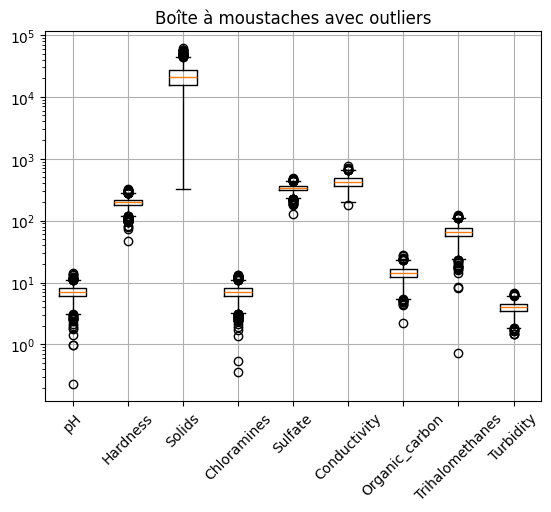

In [42]:
ph = df['ph'].dropna()
hardness = df['Hardness']
solids = df['Solids']
chloramines = df['Chloramines']
sulfate = df['Sulfate'].dropna()
conductivity = df['Conductivity']
organic_carbon = df['Organic_carbon']
trihalomethanes = df['Trihalomethanes'].dropna()
turbidity = df['Turbidity']
potability = df['Potability']

plt.boxplot([ph,hardness,solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity], showfliers=True)
plt.xticks([1,2,3,4,5,6,7,8,9],['pH','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity'])
plt.yscale('log')
plt.title("Boîte à moustaches avec outliers")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [43]:
df.loc[(potability==1) & (ph<8.5) & (ph>6.5)]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
253,6.800119,242.008082,39143.403329,9.501695,187.170714,376.456593,11.432466,73.777275,3.854940,1
254,7.174135,203.408935,20401.102461,7.681806,287.085679,315.549900,14.533510,74.405616,3.939896,1
255,7.657991,236.960889,14245.789121,6.289065,373.165363,416.624189,10.464239,85.852769,2.437296,1
256,8.322987,207.252462,28049.646283,8.827061,297.813085,358.725869,18.709273,60.911420,4.052136,1
262,6.548021,278.585105,25508.386949,6.749378,366.871502,497.321753,16.563167,79.323678,3.611860,1
...,...,...,...,...,...,...,...,...,...,...
3265,8.197353,203.105091,27701.794055,6.472914,328.886838,444.612724,14.250875,62.906205,3.361833,1
3266,8.372910,169.087052,14622.745494,7.547984,NaN,464.525552,11.083027,38.435151,4.906358,1
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1


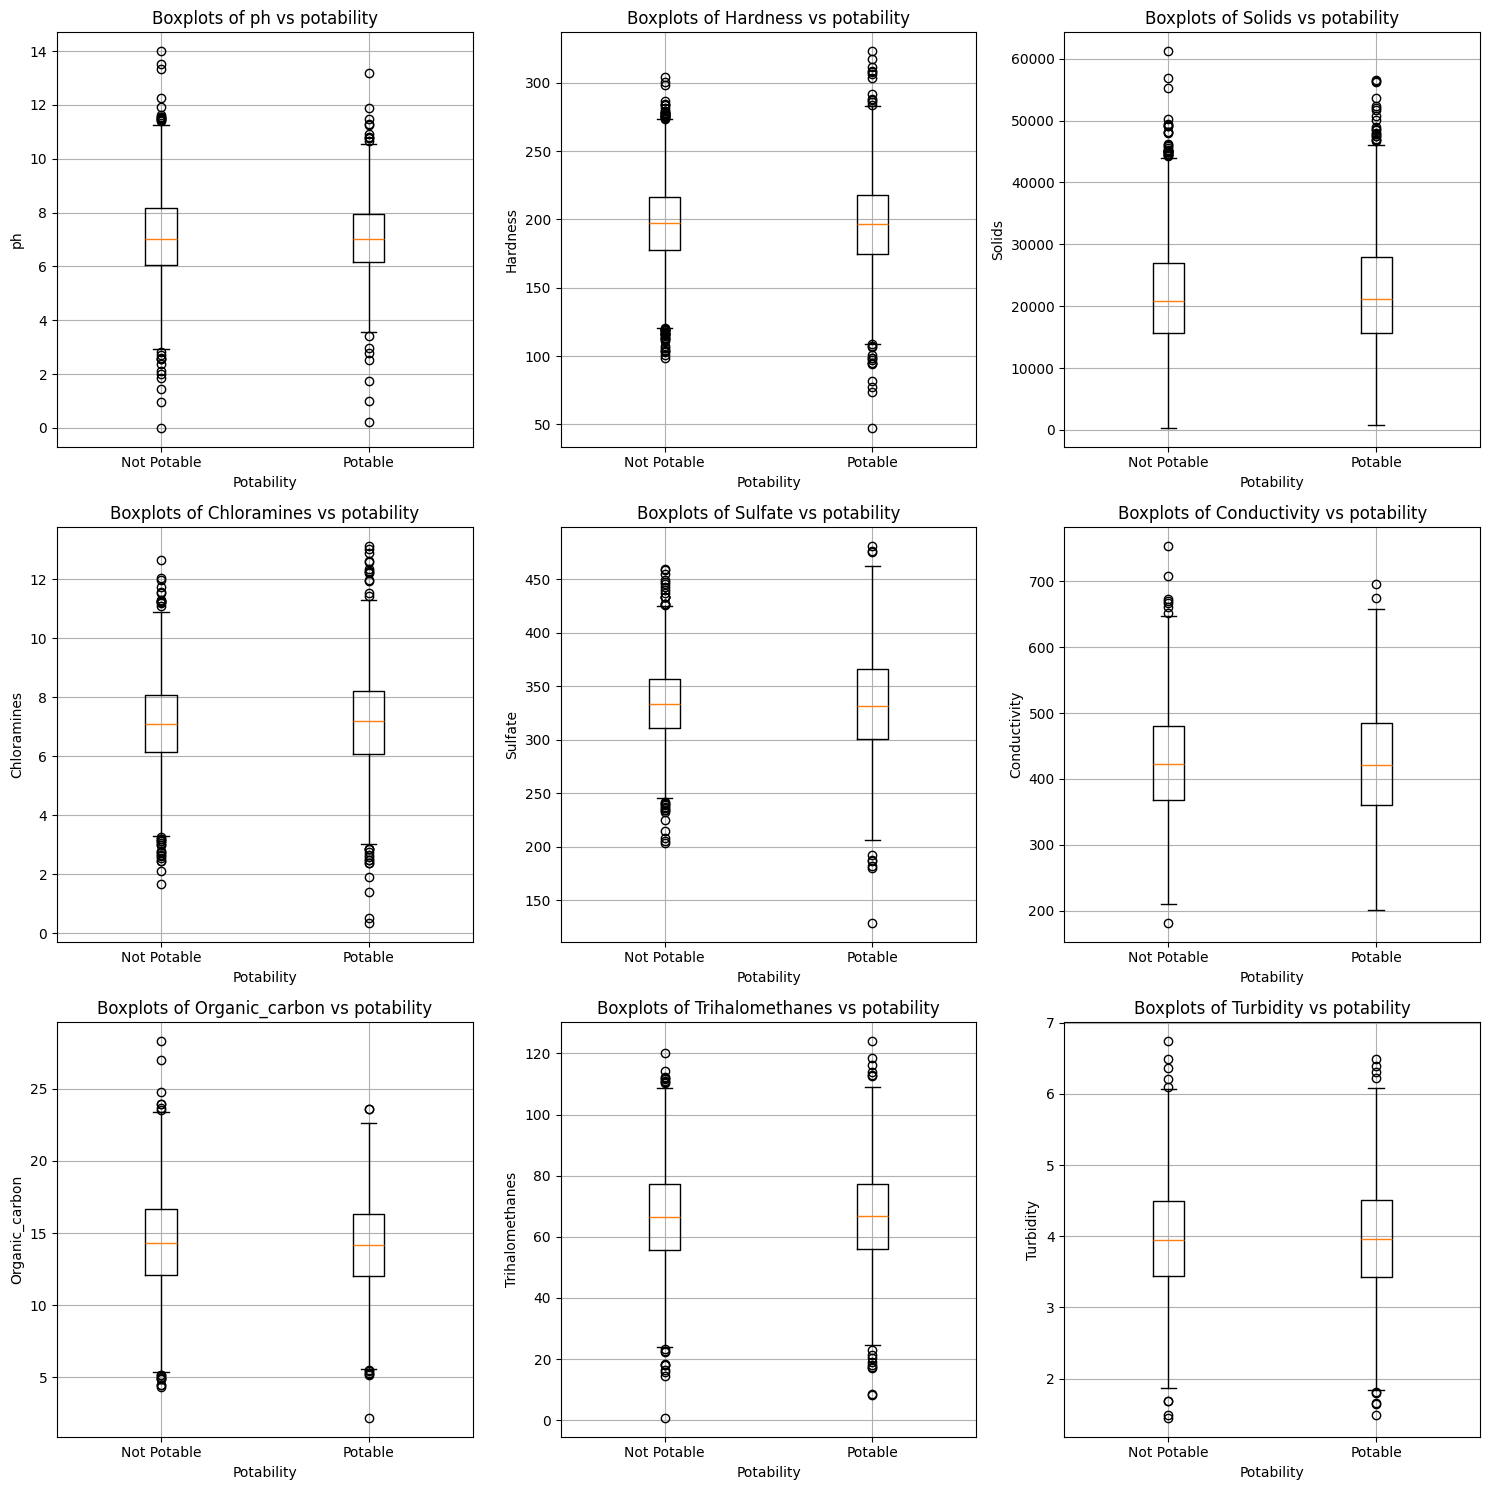

In [44]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
axes = axes.flatten()

for i, var in enumerate([ph, hardness, solids, chloramines, sulfate, conductivity, organic_carbon, trihalomethanes, turbidity]):
    ax = axes[i]
    ax.boxplot([var[potability == 0], var[potability == 1]], showfliers=True)
    ax.set_title(f"Boxplots of {var.name} vs potability")
    ax.set_xticklabels(['Not Potable', 'Potable'])
    ax.set_xlabel('Potability')
    ax.set_ylabel(var.name)
    ax.grid(True)

plt.tight_layout()
plt.show()


Après avoir examiné les données relatives à la potabilité de l'eau et plusieurs variables telles que le pH, la dureté de l'eau, la concentration de solides dissous, les chloramines, le sulfate, la conductivité, le carbone organique, les trihalométhanes et la turbidité, nous constatons qu'aucune de ces variables ne semble présenter de différences significatives entre les échantillons d'eau potable et non potable.

Cela suggère que dans notre ensemble de données, ces caractéristiques ne sont pas fortement corrélées avec la potabilité de l'eau. Cette conclusion pourrait être due à plusieurs facteurs, notamment la complexité de la potabilité de l'eau, la présence de variables non incluses dans notre analyse, ou même des erreurs de mesure ou de collecte de données.